## About Dataset

Time Series data of a specific stock. Daily data. Date, High and Low price of the stock, Closing Price and Volume of the stock traded are the fields. Around 3020 records

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [7]:
df=pd.read_csv("stock_data.csv", parse_dates=True, index_col="Date")

In [8]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


<AxesSubplot:xlabel='Date'>

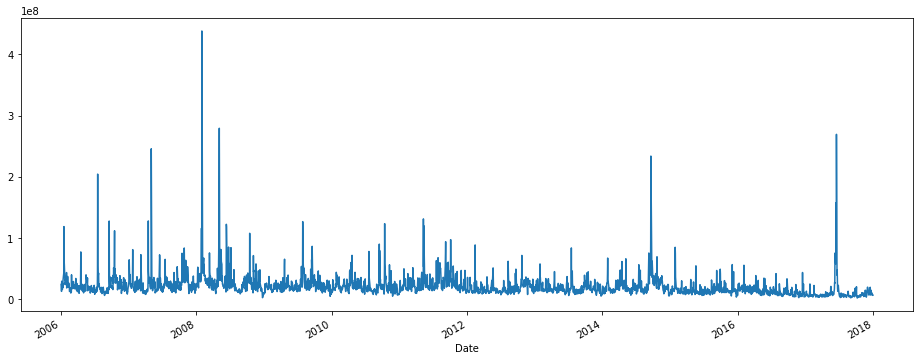

In [9]:
#Volume Visualization
df['Volume'].plot(figsize=(16, 6))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

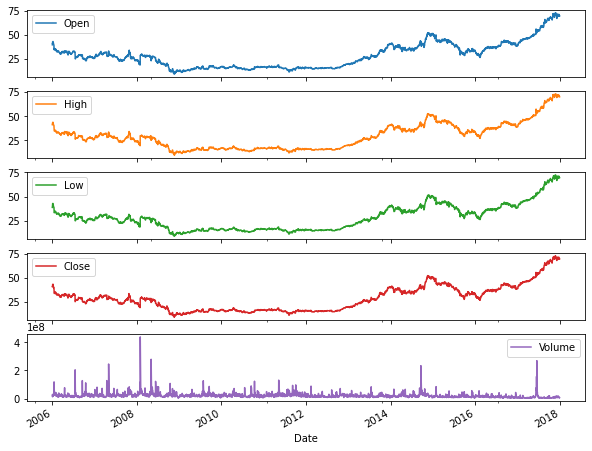

In [10]:
#Visualization of Time Series
df.plot(subplots=True, figsize=(10, 8))

## Seasonality

Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year.

Text(0, 0.5, 'Volume')

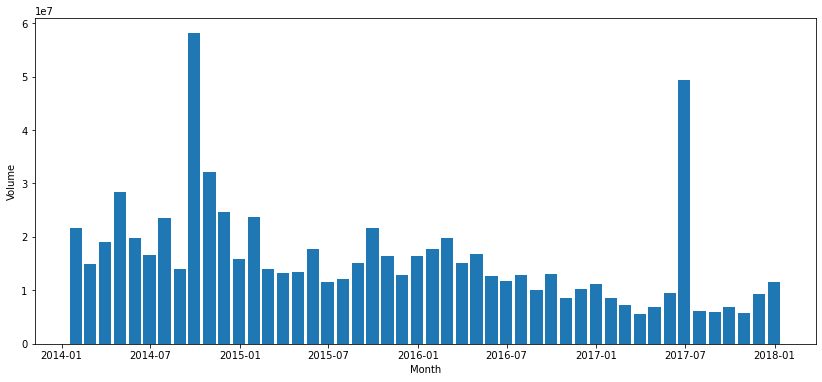

In [13]:
#Seasonality from 2016
df_month = df.resample("M").mean()
fig, ax = pt.subplots(figsize=(14,6))
#pt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #used to set the formatter of the major ticker.
ax.bar(df_month['2014':].index, df_month.loc['2014':, "Volume"], width=25, align='center')
pt.xlabel("Month")
pt.ylabel("Volume")

In [14]:
df_month

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-31,38.245500,38.694000,37.641500,38.113000,3.400594e+07
2006-02-28,33.141579,33.436842,32.627368,32.975789,2.329848e+07
2006-03-31,31.333478,31.696957,30.929130,31.218696,2.095522e+07
2006-04-30,32.383684,32.790000,31.914737,32.283158,2.200768e+07
2006-05-31,31.744545,32.175455,31.171364,31.517273,2.218047e+07
...,...,...,...,...,...
2017-08-31,61.336522,61.964348,60.763478,61.434783,5.878167e+06
2017-09-30,65.530000,66.081000,65.013500,65.538000,6.951704e+06
2017-10-31,67.611364,68.184091,67.093636,67.637727,5.671722e+06


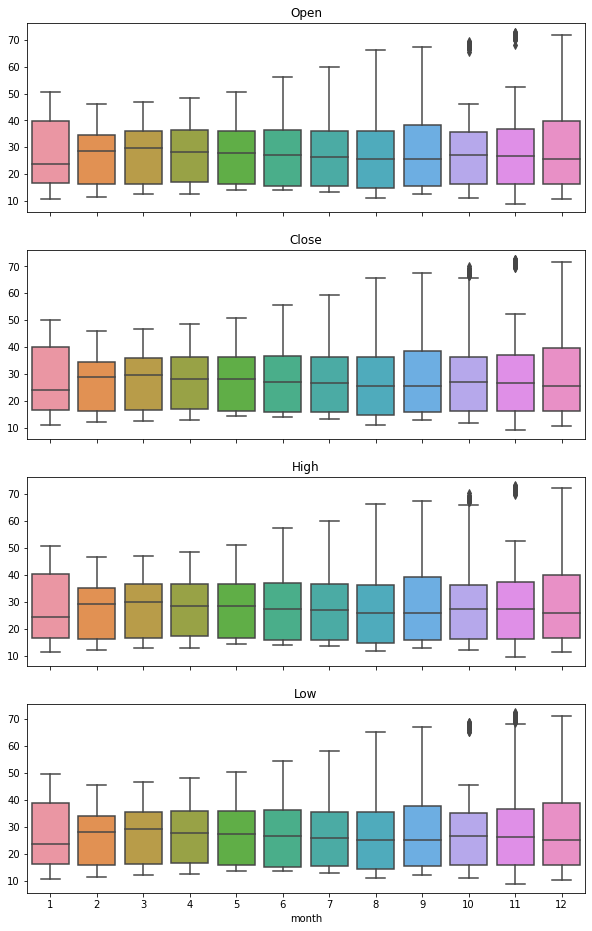

In [95]:
#start, end = '2016-01', '2016-12'
df_month = df.resample("M").mean()
fig, axes = pt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = df, x='month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')
#Python’s zip() function is defined as zip(*iterables). The function takes in iterables as arguments and returns an iterator. 
#This iterator generates a series of tuples containing elements from each iterable. zip() can accept any type of iterable, 
#such as files, lists, tuples, dictionaries, sets, and so on.

## Resampling and Rolling
Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference. 

<AxesSubplot:xlabel='Date'>

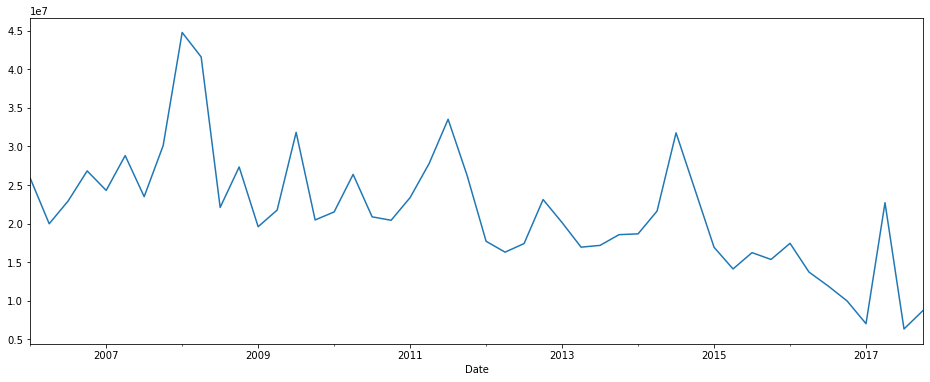

In [17]:
#Remember that first line plot of ‘Volume’ data above. As we discussed before, it was too busy. 
#It can be fixed by resampling. Instead of plotting daily data, plotting monthly average will fix this issue to a large extent. 
#df_qrtr=df.resample("Q").mean()
df_semi=df.resample("Q").mean()
df_semi['Volume'].plot(figsize=(16, 6))

## DataFrame.resample()
Resampling generates a unique sampling distribution on the basis of the actual data. 
We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.
Most commonly used time series frequency are –

W : weekly frequency

M : month end frequency

SM : semi-month end frequency (15th and end of month)

Q : quarter end frequency

In [19]:
df_week = df.resample("W").mean()

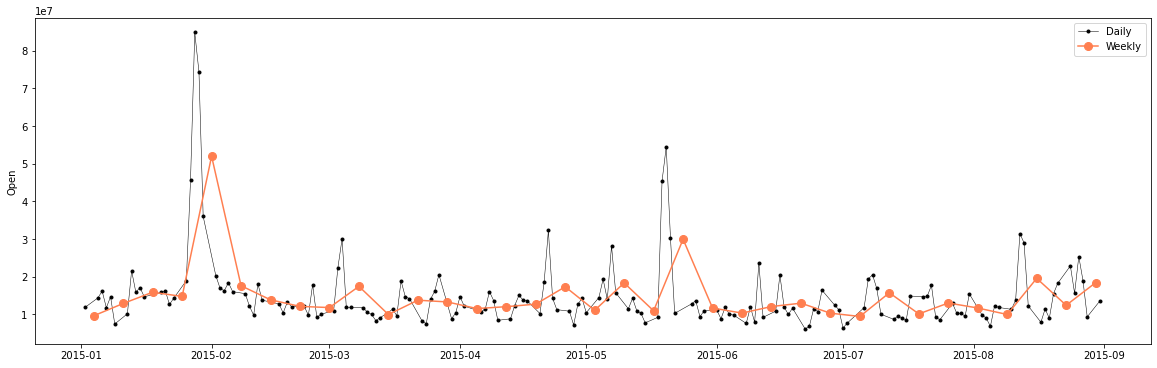

In [24]:
start, end = '2015-01', '2015-08'
fig, ax = pt.subplots(figsize=(20, 6))
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Open")
ax.legend()

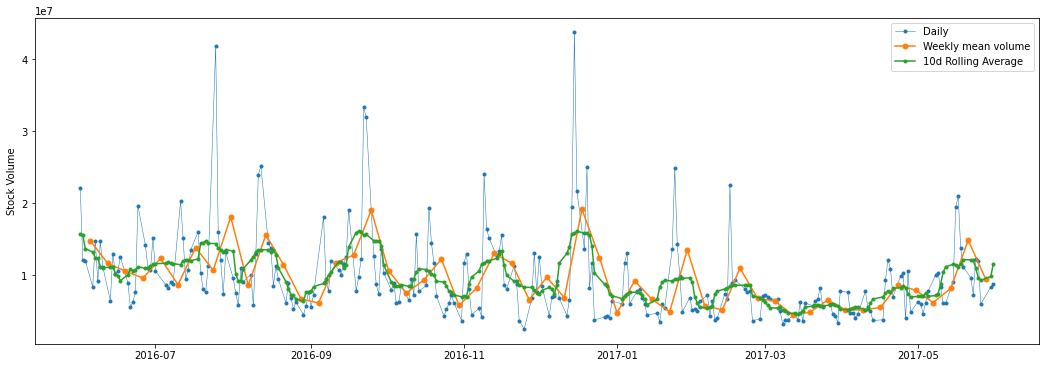

In [26]:
df_7d_rolling = df.rolling(10, center=True).mean()
#Pandas dataframe.rolling() function provides the feature of rolling window calculations.
start, end = '2016-06', '2017-05'
fig, ax = pt.subplots(figsize=(18, 6))
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='10d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

## Plotting the Change

<AxesSubplot:xlabel='Date'>

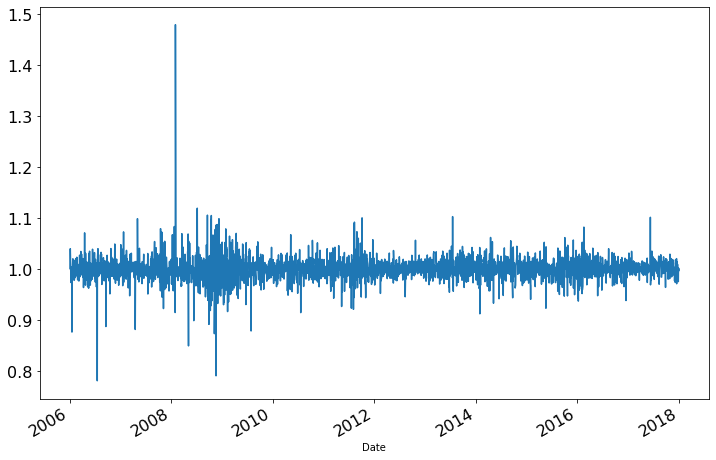

In [22]:
#The shift function shifts the data before or after the specified amount of time. 
#.div() (Division) helps to fill up the missing data
#Each element of df will be divided by each element of ‘df.Close.shift()’..
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(12, 8), fontsize = 16)

<AxesSubplot:xlabel='Date'>

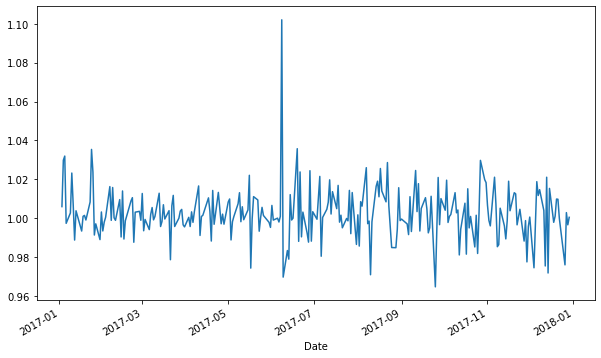

In [23]:
df['2017']['Change'].plot(figsize=(10, 6))

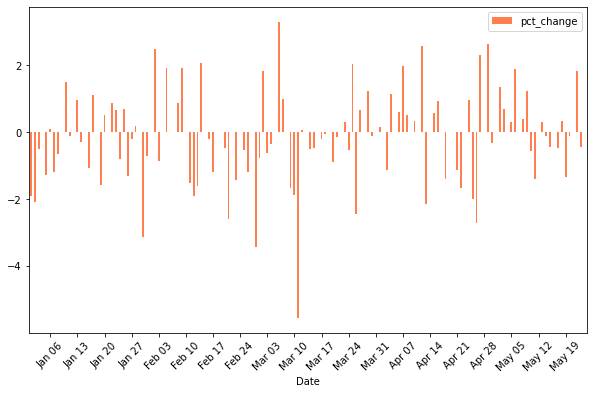

In [27]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100
#Computes the percentage change from the immediately previous row by default. 
fig, ax = pt.subplots(figsize=(10,6))
df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
pt.xticks(rotation=45)
ax.legend()

## Differencing
Differencing takes the difference in values of a specified distance.

<AxesSubplot:xlabel='Date'>

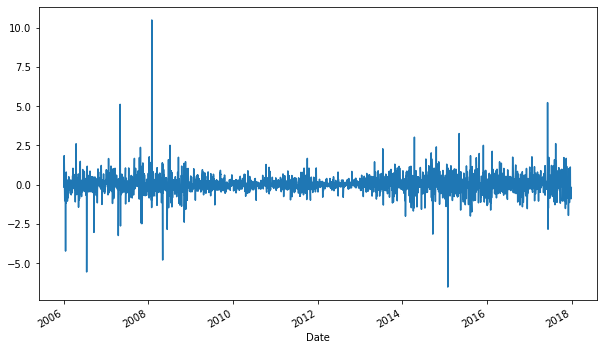

In [28]:
df.High.diff().plot(figsize=(10, 6))

### Expanding Window
Another way of transformation. It keeps adding the cumulative. For example, if you add an expanding function to the ‘High’ column first element remains the same. The second element becomes cumulative of the first and second element, the third element becomes cumulative of the first, second, and third element, and so on. 

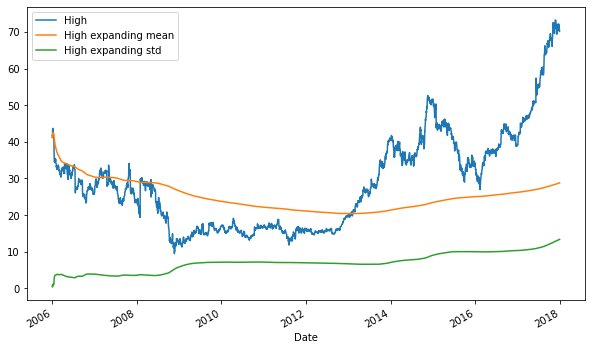

In [43]:
fig, ax = pt.subplots(figsize=(10, 6))
ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')
ax.legend()

## Heat Map

In [85]:
df.index = pd.to_datetime(df.index)

df['year'] = df.index.year
df['month'] = df.index.month
df.head()

,Open,High,Low,Close,Volume,Name,year,month
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,2006,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,2006,1
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,2006,1
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,2006,1
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,2006,1


In [86]:
import calendar
all_month_year_df = pd.pivot_table(df, values="Open",
                                   index=["month"],
                                   columns=["year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_dfThe calendar is ready with monthly average ‘Open’ data
#The calendar is ready with monthly average ‘Open’ data

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
Jan,38.245500,27.990500,21.926667,12.084500,16.572105,16.441000,15.719500,19.866667,39.268571,48.310500,30.250526,42.256000,27.439336
Feb,33.141579,30.297368,28.884000,12.601053,15.252632,16.778421,15.445500,20.623684,37.397895,43.861579,29.107000,44.916316,27.321515
Mar,31.333478,30.549545,28.070000,13.255455,16.256087,16.663043,14.986818,22.673000,37.975238,43.929091,34.064545,46.230870,27.995209
Apr,32.383684,30.021000,27.930000,13.802381,17.462500,16.853500,15.231500,23.988636,35.254762,44.590476,36.873810,47.207895,28.401504
May,31.744545,29.288182,26.731905,14.903000,15.965000,17.020476,15.405000,26.160455,34.852857,43.475500,36.822381,49.645909,28.583543
Jun,31.005455,27.749524,24.046667,16.000000,15.136364,15.255000,15.405238,25.972500,34.901429,41.403182,36.883636,53.327727,28.146744
Jul,29.893500,25.954286,21.922273,15.792273,14.435714,14.597000,15.781429,27.197273,35.087273,38.580455,38.095500,56.966000,27.744625
Aug,28.064348,23.283043,19.750952,14.764286,13.790000,12.814348,15.244783,27.579545,36.836190,34.921429,41.082174,61.336522,27.533233
Sep,27.481000,24.784737,18.612857,16.067143,13.946190,14.174762,15.511053,29.986000,40.662857,30.651905,43.306190,65.530000,28.373143
Oct,24.528636,29.123913,13.361739,17.060909,15.419524,15.786190,16.151429,33.518696,41.253043,32.425000,42.594286,67.611364,29.172992


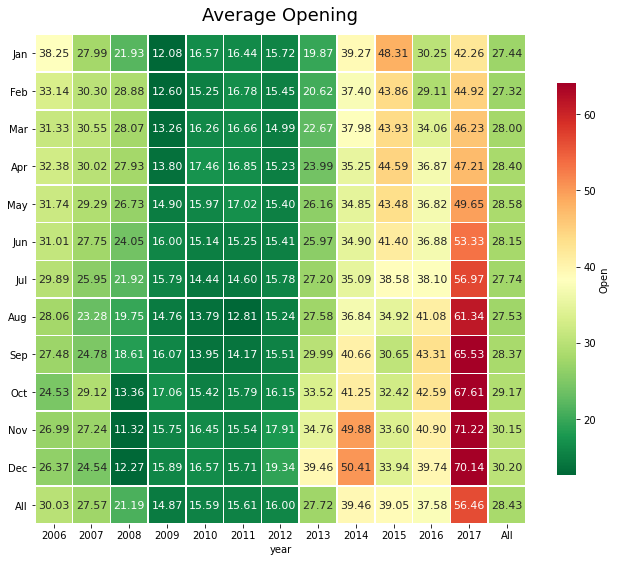

In [87]:
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
pt.title('Average Opening', fontdict={'fontsize':18},    pad=14);

### Decomposition
Decomposition will show the observations and these three elements in the same plot:

Trend: Consistent upward or downward slope of a time series.

Seasonality: Clear periodic pattern of a time series

Noise: Outliers or missing values

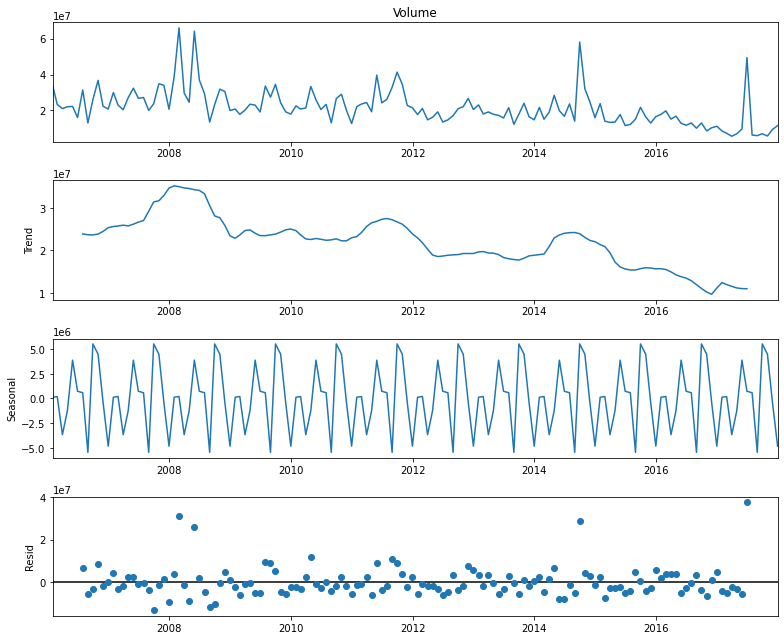

In [115]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Volume'], model='Additive')
#The seasonal_decompose() method can take up to six parameters. 
fig = decomposition.plot()
pt.show()